You are expected to perform a simple classification problem - that of labelling emails as
spam or non-spam, based on their content in terms of words. The dataset has been taken
from UCI Machine learning repository (https://archive.ics.uci.edu/ml/datasets/Spambase).
This must be achieved using two machine learning models based on K Nearest Neighbors
(KNN)

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [3]:
#import dataset
df = pd.read_csv("spambase.data")
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


Summary
The Spambase Data Set contains a collection of email messages, where each message is classified as either spam or non-spam (ham). The data set contains 4,601 instances and 57 attributes, which can be categorized into three groups:

1) Word frequency features (48 attributes)
    The first 48 attributes represent the percentage of words in the email that match a particular word or set of words. These attributes are based on alist of 3,870 commonly occurring words and characters in email messages. Each attribute corresponds to the frequency of occurrence of a particular word or set of words in the email message.

2) Character frequency features (6 attributes)
    The next six attributes represent the percentage of characters in the email that match a particular character or set of characters. These attributes are based on the same list of characters as the word frequency features.

3) Other features (3 attributes)
    The last three attributes represent other features of the email message, including the length of the longest uninterrupted sequence of capital letters, the total length of the email message, and the frequency of exclamation marks.

The target variable is the class attribute, which is either 1 (spam) or 0 (non-spam).

In [4]:
#check number of rows and columns in dataset
df.shape

(4600, 58)

In [5]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  391


In [6]:
#droping all duplicates
df.drop_duplicates(inplace=True)

#droping all null values
df.dropna(how='all', inplace=True)

In [7]:
print("Number of rows after dropping duplicates: ", len(df))

Number of rows after dropping duplicates:  4209


In [8]:
#print all spam emails
spam_data = df[df.iloc[:, -1] == 1].shape[0]
print("No. of spam emails", spam_data)

non_spam_data = df[df.iloc[:, -1] == 0].shape[0]
print("No. of non-spam emails", non_spam_data)

No. of spam emails 1678
No. of non-spam emails 2531


In [9]:
y = df.iloc[:, -1] # last column as target variable
df= df.drop("1", axis="columns")
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [10]:
column_names = ["word_freq_make",
                "word_freq_address",
                "word_freq_all",
                "word_freq_3d",
                "word_freq_our",
                "word_freq_over",
                "word_freq_remove",
                "word_freq_internet",
                "word_freq_order",
                "word_freq_mail",
                "word_freq_receive",
                "word_freq_will",
                "word_freq_people",
                "word_freq_report",
                "word_freq_addresses",
               "word_freq_free",
                "word_freq_business",
                "word_freq_email",
                "word_freq_you",
                "word_freq_credit",
                "word_freq_your",
                "word_freq_font",
                "word_freq_000",
                "word_freq_money",
                "word_freq_hp",
                "word_freq_hpl",
                "word_freq_george",
                "word_freq_650",
                "word_freq_lab",
                "word_freq_labs", "word_freq_telnet","word_freq_857",  "word_freq_data", "word_freq_415","word_freq_85", 'word_freq_technology', "word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu", "word_freq_table","word_freq_conference","char_freq_;","char_freq_(","char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average","capital_run_length_longest","capital_run_length_total" ]

df.columns = column_names
print("Column names after renaming: ", df.columns)

Column names after renaming:  Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_ta

# PCA

We’ll go ahead and standardise this data as all the data is on a different scale.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)


In [12]:
scaled_df=pd.DataFrame(data=scaled_data, columns= df.columns)

In [13]:
scaled_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,...,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03
mean,4.369805e-15,1.983380e-15,1.451599e-15,-1.379668e-16,-3.749964e-15,3.194113e-15,1.266633e-14,-3.066421e-15,-4.465713e-15,3.037696e-15,...,-1.912550e-15,4.391975e-15,-8.901303e-16,-9.937538e-16,-2.599937e-15,-4.821306e-15,7.586788e-17,-3.956109e-16,5.622993e-16,7.309166e-17
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,...,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479680e-01,-2.477619e-01,-5.650479e-01,-4.664991e-02,-4.729856e-01,-3.502513e-01,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-5.253738e-01,-1.643841e-01,-3.332409e-01,-3.173668e-01,-1.050837e-01,-1.322665e-01,-2.562244e-01,-4.690582e-01
25%,-3.479680e-01,-2.477619e-01,-5.650479e-01,-4.664991e-02,-4.729856e-01,-3.502513e-01,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-5.253738e-01,-1.643841e-01,-3.332409e-01,-3.173668e-01,-1.050837e-01,-1.133509e-01,-2.261615e-01,-4.060182e-01
50%,-3.479680e-01,-2.477619e-01,-5.650479e-01,-4.664991e-02,-4.729856e-01,-3.502513e-01,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-2.591909e-01,-1.643841e-01,-3.142675e-01,-3.173668e-01,-1.050837e-01,-9.313814e-02,-1.860778e-01,-3.074171e-01
75%,-3.479680e-01,-2.477619e-01,2.881769e-01,-4.664991e-02,1.231135e-01,-3.502513e-01,-2.957690e-01,-2.632980e-01,-3.256596e-01,-8.906033e-02,...,-1.164211e-01,-1.600299e-01,1.820165e-01,-1.643841e-01,5.927098e-02,-9.626226e-02,-1.050837e-01,-5.063097e-02,-4.077419e-02,-2.939455e-02
max,1.478534e+01,3.119301e+01,9.324604e+00,3.160616e+01,1.406601e+01,2.095207e+01,1.800369e+01,2.681583e+01,1.831755e+01,2.730852e+01,...,3.338210e+01,1.720410e+01,3.503375e+01,3.843384e+01,3.818036e+01,2.472585e+01,4.538220e+01,3.309814e+01,4.978834e+01,2.513488e+01


PCA component starting

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
new_data = pca.fit_transform(scaled_df)

In [25]:
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
                            , columns = ['PC1', 'PC2','PC3','PC4'])

In [26]:
principal_Df.head()

,PC1,PC2,PC3,PC4
0,-1.293656,2.006099,0.074478,-0.422377
1,-1.612845,4.822331,3.127122,-1.179106
2,-0.857357,0.413698,-0.549397,-0.007296
3,-0.858210,0.413031,-0.551523,-0.007574
4,-0.496909,-0.506171,-0.351299,0.435057


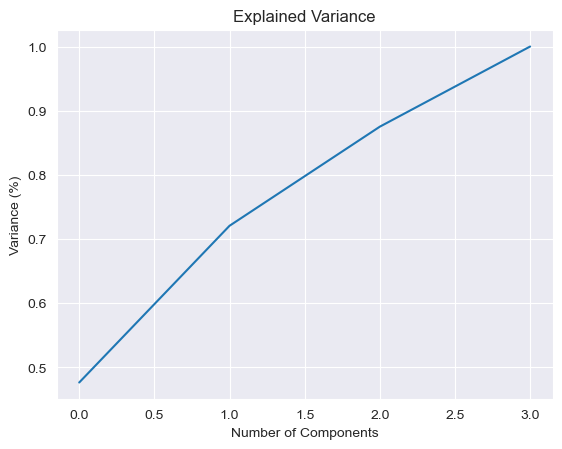

In [27]:

principalComponents = pca.fit_transform(principal_Df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [28]:
print(df.shape)
print(scaled_df.shape)
print(principal_Df.shape)

(4209, 57)
(4209, 57)
(4209, 4)


Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
X = principal_Df  # Features (all columns)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
# Print the shapes of the resulting subsets
print("Training subset shape:", X_train.shape, y_train.shape)
print("Testing subset shape:", X_test.shape, y_test.shape)

Training subset shape: (3156, 4) (3156,)
Testing subset shape: (1053, 4) (1053,)


KNN - KNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [48]:
knn.score(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9198352344740177

Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


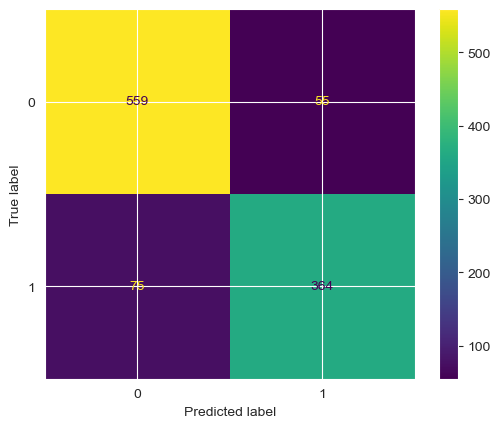

In [50]:

y_pred = knn.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       614
           1       0.87      0.83      0.85       439

    accuracy                           0.88      1053
   macro avg       0.88      0.87      0.87      1053
weighted avg       0.88      0.88      0.88      1053



In [52]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test,y_pred)
print(ac*100)

87.65432098765432
